In [1]:
from __future__ import division

import numpy as np
import os, sys
from PIL import Image
import pandas as pd
import json
import pickle

from matplotlib import pylab, mlab, pyplot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.path import Path
import matplotlib.patches as patches
%matplotlib inline

from IPython.core.pylabtools import figsize, getfigs

import seaborn as sns

import random

from scipy.stats import norm
from IPython.display import clear_output

import copy
import importlib


### Add Paths

## root paths
curr_dir = os.getcwd()
proj_dir = os.path.abspath(os.path.join(curr_dir,'..')) ## use relative paths

## add helpers to python path
import sys
if os.path.join(proj_dir, 'stimuli') not in sys.path:
    sys.path.append(os.path.join(proj_dir, 'stimuli'))

## custom helper modules
import blockworld_helpers as utils

/Users/will/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [42]:
# setup
block_dims = [(2,1),(1,2)]
block_colors = ['#B32F0A','#0A2FB3']
black = ['#000000','#000000'] # used to display silhouettes
grey = ['#333333','#333333']
world_width = 8
world_height = 8
world_center = int((world_width-1)/2)

In [52]:
def world(block_dict):
    return utils.worldify(block_dict,
                   block_dims = block_dims,
                   block_colors = block_colors,
                   world_width = world_width,
                   world_height = world_height
                  )

def inspect_composite(composite_row):
    print('tower A')
    utils.draw_tower(world(composite_row['tower_A_dict']))
    print('tower B')
    utils.draw_tower(world(composite_row['tower_B_dict']))
    print('composite')
    utils.draw_tower(world(composite_row['block_dict']))


In [5]:
df_4_block = pd.read_pickle("./tower_4_block_unique_silhouettes/\
                               tower_4_block_unique_silhouettes.pkl")

df_composite = pd.read_pickle("./tower_4_block_unique_silhouettes_composites_json/\
                                 tower_4_block_unique_silhouettes_composites.pkl")

df_4_block['block_dict'] = df_4_block['stim']

In [21]:
df_composite['block_dict'][0]

[{'x': 0, 'y': 0, 'height': 1, 'width': 2},
 {'x': 0, 'y': 1, 'height': 1, 'width': 2},
 {'x': 1, 'y': 2, 'height': 2, 'width': 1},
 {'x': 1, 'y': 4, 'height': 2, 'width': 1},
 {'x': 2, 'y': 0, 'height': 1, 'width': 2},
 {'x': 2, 'y': 1, 'height': 1, 'width': 2},
 {'x': 3, 'y': 2, 'height': 2, 'width': 1},
 {'x': 3, 'y': 4, 'height': 2, 'width': 1}]

tower A


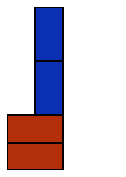

tower B


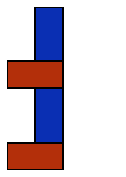

composite


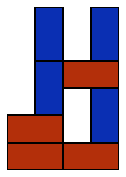

In [92]:
inspect_composite(df_composite.loc[1])

In [93]:
tower = df_composite['block_dict'][1]

In [94]:
def get_movement(old_x_location, new_x_location):
    diff = new_x_location - old_x_location
    
    if diff == 0:
        return ''
    elif diff > 0:
        return '(r ' + str(diff) + ') '
    elif diff < 0:
        return '(l ' + str(-diff) + ') '


def parse(block_dict):

    program = '('
    old_x_location = 0

    for block in tower:
        
        new_x_location = block['x']
        
        movement = get_movement(old_x_location, new_x_location)
        program += movement
        
        if (block['height'] == 2) & (block['width'] == 1):
            program += 't '
        elif (block['height'] == 1) & (block['width'] == 2):
            program += 'h '
        else:
            print('Incorrect block size')
        
        old_x_location = new_x_location
        
    program = program[:-1] #remove trailing space
    program += ')'
    return program

In [95]:
parse(tower)

'(h h (r 1) t t (r 1) h (r 1) t (l 1) h (r 1) t)'